<a href="https://colab.research.google.com/github/KhodaMaryam/Vehicle-Maneuver-Simulator/blob/main/Project_Road_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Road Safety Project**

$Name:Maryam$ $Khodabakhshloo$
    
$Gmail:khodabakhshloo1995@gmail.com$
<img scr='Maryam.jpg' >

# Libraries

In [ ]:
from matplotlib import pyplot as plt
import time
import numpy as np
import datetime
import pandas as pd
from datetime import datetime
import math

# Preprocessing

In [ ]:
path='/home/m/Desktop/Prof.Miranda-Moreno/Trajectories.csv'
df=pd.read_csv(path)
mising_data=df.isnull().sum()
df.drop('User_Class',axis=1,inplace=True)
# df["Frame_Number"] = df["Frame_Number"]/15
#print(type(mising_data))
print("-------------------------------------")
# print('mising_data',mising_data)
# print("-------------------------------------")
print("max and min of  X Coordinate ","   max: ",df['X_Coordinate'].max(),"   min: ",df['X_Coordinate'].min())
print("max and min of  Y Coordinate","    max: ",df['Y_Coordinate'].max(),"   min: ",df['Y_Coordinate'].min())
df.head()

-------------------------------------
max and min of  X Coordinate     max:  54.14    min:  24.97
max and min of  Y Coordinate     max:  54.98    min:  19.41


User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed
0        0             1         40.29         33.82   Vehicle  15.743570
1        0             2         40.56         33.93   Vehicle  15.743570
2        0             3         40.73         34.08   Vehicle  12.242647
3        0             4         41.03         34.26   Vehicle  18.892284
4        0             5         41.33         34.45   Vehicle  19.175703

# Q1 & Q2

- **Number of trajectories for each type of user**
- **All of trajectories**

In [ ]:
Number_of_unique_ID=df['User_ID'].nunique()
Number_of_User_Type=df['User_Type'].nunique()
print('Number_of_unique_ID:  ',Number_of_unique_ID,"\nNumber_of_User_Type:  ",Number_of_User_Type)
grouped = df.groupby(['User_Type','User_ID'])

Number_of_unique_ID:   1892 
Number_of_User_Type:   3


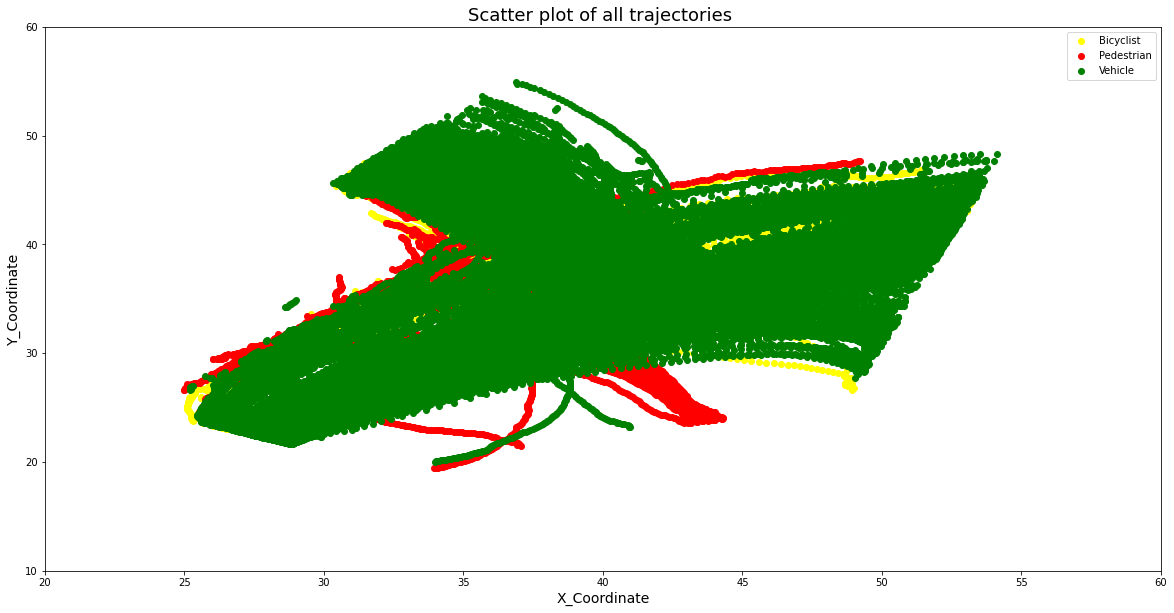

Total Number of Trajectories         :  1892 

          Pedestrian Trajectories    :  74 
          Bicyclist  Trajectories    :  171 
          Vehicles   Trajectories    :  1647


In [ ]:
Pedestrian_Trajectoy=[]
Bicyclist_Trajectoy=[]
Vehicles_Trajectoy=[]
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.title("Scatter plot of all trajectories ",fontsize=18)
plt.xlabel('X_Coordinate', fontsize=14)
plt.ylabel('Y_Coordinate', fontsize=14)
plt.xlim(20, 60)
plt.ylim(10, 60)
my_labels = {"x1" : "Vehicle", "x2" : "Bicyclist","x3" : "Pedestrian"}
for name, group in grouped:
    path=group.to_numpy()
    yline = path[:,[3]].flatten()
    xline = path[:,[2]].flatten()
    if name[0]=='Vehicle':
        Vehicles_Trajectoy.append(group)
        plt.scatter(xline, yline,color='green',label=my_labels["x1"])
        my_labels["x1"] = "_nolegend_"
    if name[0]=='Cyclist':
        Bicyclist_Trajectoy.append(group)
        plt.scatter(xline, yline,color='yellow',label=my_labels["x2"])
        my_labels["x2"] = "_nolegend_"
    if name[0]=='Pedestrian':
        Pedestrian_Trajectoy.append(group)
        plt.scatter(xline, yline,color='red',label=my_labels["x3"])
        my_labels["x3"] = "_nolegend_"
plt.legend(loc='upper right')
plt.show()
print("Total Number of Trajectories         : ",Number_of_unique_ID,
      "\n\n          Pedestrian Trajectories    : ",len(Pedestrian_Trajectoy),
      "\n          Bicyclist  Trajectories    : ",len(Bicyclist_Trajectoy),
      "\n          Vehicles   Trajectories    : ",len(Vehicles_Trajectoy))

# Q3

### First solution

In [ ]:
# SPEED = []
# result = []
# for value in df["Marks"]:
#     if value >= 33:
#         result.append("Pass")
#     elif value < 0 and value > 100:
#         result.append("Invalid")
#     else:
#         result.append("Fail")

# df["Result"] = result
# print(df)


Pedestrian_Trajectoy_Speed_Modification=[]
fpm=15
for i in Pedestrian_Trajectoy:
#     print(len(i), '\n', i)
    SPEED = []
    a=i['X_Coordinate'].tolist()
    b=i['Y_Coordinate'].tolist()
    for p in range(len(a)):
        if p==0:
#           print((a[1]-a[0])**2 + (b[1]-b[0])**2)
            SPEED.append(math.sqrt((a[1]-a[0])**2 + (b[1]-b[0])**2)* 3.6*fpm)
        if p>0:
            SPEED.append(math.sqrt((a[p]-a[p-1])**2 + (b[p]-b[p-1])**2)*3.6*fpm)
#     print(len(SPEED))
#     print(SPEED)
    Pedestrian_Trajectoy_Speed_Modification.append(SPEED)
##print(type(Pedestrian_Trajectoy))
##print(Pedestrian_Trajectoy[:2])
# print(Pedestrian_Trajectoy_Speed_Modification)
# print(len(Pedestrian_Trajectoy_Speed_Modification))
#     i['Local_X']=(i['Local_X']-i['Local_X'].min())/(i['Local_X'].max()-i['Local_X'].min())
#     Lane_Change_Left_Sampel_I.append(i)


### Second Solution

- **Speed of each road user**

In [ ]:
def SPeed(user):
    fpm=15
    Trajectoy_Speed=[]
    for i in user:
#     print(type(i),'\n',i)
        diff_X=i['X_Coordinate'].diff()
        diff_Y=i['Y_Coordinate'].diff()
        diff_X.iloc[0] =diff_X.iloc[1]
        diff_Y.iloc[0] =diff_Y.iloc[1]
#     print(type(diff_Y),'\n',diff_Y)
        diff_Y=diff_Y.to_numpy()
        diff_X=diff_X.to_numpy()
#     print(diff_Y**2 )
#     print(diff_X**2 )
        SPEED=[(np.sqrt((diff_X[i]**2)+(diff_Y[i]**2)))* 3.6*fpm for i in range(len(diff_X))]
        i['SPEED'] = SPEED
        Trajectoy_Speed.append(i)
    return(Trajectoy_Speed)


In [ ]:
#  Pedestrian_Trajectories ,Bicyclist_Trajectoy ,Vehicles_Trajectoy
while True:
    Users_Speed_In_Each_Frame=input("Enter Pedestrian or Bicyclist or Vehicles:  ")
    if Users_Speed_In_Each_Frame=='Pedestrian':
        for i in SPeed(Pedestrian_Trajectoy):
            i.reset_index(inplace=True,drop=True)
            print(i)
        break
    elif Users_Speed_In_Each_Frame=='Bicyclist':
        for i in SPeed(Bicyclist_Trajectoy):
            i.reset_index(inplace=True,drop=True)
            print(i)
        break
    elif Users_Speed_In_Each_Frame=='Vehicles':
        for i in SPeed(Vehicles_Trajectoy):
            i.reset_index(inplace=True,drop=True)
            print(i)
        break
    else:
        print("\nyou have misspelling")

Enter Pedestrian or Bicyclist or Vehicles:  Vehicles
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0         0             1         40.29         33.82   Vehicle  15.743570   
1         0             2         40.56         33.93   Vehicle  15.743570   
2         0             3         40.73         34.08   Vehicle  12.242647   
3         0             4         41.03         34.26   Vehicle  18.892284   
4         0             5         41.33         34.45   Vehicle  19.175703   
5         0             6         41.63         34.63   Vehicle  18.892284   
6         0             7         41.94         34.81   Vehicle  19.357324   
7         0             8         42.26         35.01   Vehicle  20.377399   
8         0             9         42.53         35.18   Vehicle  17.229301   
9         0            10         42.77         35.33   Vehicle  15.283049   
10        0            11         43.09         35.51   Vehicle  19.826165   
11        0

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        74          1286         29.42         24.12   Vehicle  18.596709   
1        74          1287         29.27         24.43   Vehicle  18.596709   
2        74          1288         29.16         24.44   Vehicle   5.964495   
3        74          1289         29.34         24.22   Vehicle  15.349684   
4        74          1290         29.39         24.26   Vehicle   3.457687   
5        74          1291         29.43         24.30   Vehicle   3.054701   
6        74          1292         29.48         24.34   Vehicle   3.457687   
7        74          1293         29.52         24.38   Vehicle   3.054701   
8        74          1294         29.57         24.42   Vehicle   3.457687   
9        74          1295         29.63         24.38   Vehicle   3.893995   
10       74          1296         29.67         24.42   Vehicle   3.054701   
11       74          1297         29.71         24.46   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       119          2060         43.30         35.22   Vehicle  29.109957   
1       119          2061         42.95         35.63   Vehicle  29.109957   
2       119          2062         42.80         36.10   Vehicle  26.641216   
3       119          2063         42.48         36.60   Vehicle  32.056176   
4       119          2064         42.17         37.08   Vehicle  30.855696   
5       119          2065         41.85         37.55   Vehicle  30.704117   
6       119          2066         41.85         37.95   Vehicle  21.600000   
7       119          2067         41.52         38.45   Vehicle  32.350462   
8       119          2068         41.20         38.91   Vehicle  30.259280   
9       119          2069         40.87         39.37   Vehicle  30.570868   
10      119          2070         40.55         39.83   Vehicle  30.259280   
11      119          2071         40.23         40.27   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       151          2836         28.52         21.86   Vehicle  15.273506   
1       151          2837         28.72         22.06   Vehicle  15.273506   
2       151          2838         28.93         22.27   Vehicle  16.037182   
3       151          2839         29.10         22.53   Vehicle  16.774803   
4       151          2840         29.39         22.79   Vehicle  21.032289   
5       151          2841         29.72         23.08   Vehicle  23.723153   
6       151          2842         30.09         23.41   Vehicle  26.772239   
7       151          2843         30.29         24.03   Vehicle  35.178835   
8       151          2844         30.74         24.46   Vehicle  33.610391   
9       151          2845         31.26         24.94   Vehicle  38.214301   
10      151          2846         31.84         25.47   Vehicle  42.426958   
11      151          2847         32.56         25.95   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       218          3889         28.66         21.91   Vehicle   6.109403   
1       218          3890         28.74         21.99   Vehicle   6.109403   
2       218          3891         28.81         21.99   Vehicle   3.780000   
3       218          3892         28.90         22.08   Vehicle   6.873078   
4       218          3893         28.99         22.17   Vehicle   6.873078   
..      ...           ...           ...           ...       ...        ...   
61      218          3950         49.82         37.08   Vehicle  22.973811   
62      218          3951         50.18         37.28   Vehicle  22.238561   
63      218          3952         50.51         37.51   Vehicle  21.721160   
64      218          3953         50.81         37.73   Vehicle  20.089161   
65      218          3954         51.51         37.87   Vehicle  38.548588   

        SPEED  
0    6.109403  
1    6.109403  
2    3.780000  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        268          4779         29.39         22.31   Vehicle   5.400000   
1        268          4780         29.33         22.39   Vehicle   5.400000   
2        268          4781         29.36         22.42   Vehicle   2.291026   
3        268          4782         29.44         22.46   Vehicle   4.829907   
4        268          4783         29.40         22.46   Vehicle   2.160000   
..       ...           ...           ...           ...       ...        ...   
132      268          4911         51.51         39.34   Vehicle  13.883357   
133      268          4912         51.73         39.29   Vehicle  12.182955   
134      268          4913         51.84         39.32   Vehicle   6.156947   
135      268          4914         51.97         40.36   Vehicle  56.597049   
136      268          4915         52.59         41.41   Vehicle  65.846795   

         SPEED  
0     5.400000  
1     5.400000  


     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        286          5047         26.83         22.89   Vehicle   3.893995   
1        286          5048         26.87         22.95   Vehicle   3.893995   
2        286          5049         26.90         23.02   Vehicle   4.112517   
3        286          5050         26.94         23.09   Vehicle   4.353619   
4        286          5051         27.53         22.66   Vehicle  39.423698   
..       ...           ...           ...           ...       ...        ...   
109      286          5156         51.56         39.95   Vehicle  17.161468   
110      286          5157         51.82         40.05   Vehicle  15.042659   
111      286          5158         51.94         40.17   Vehicle   9.164104   
112      286          5159         52.00         40.66   Vehicle  26.657629   
113      286          5160         52.09         40.57   Vehicle   6.873078   

         SPEED  
0     3.893995  
1     3.893995  


     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        318          5772         25.75         23.62   Vehicle   2.414953   
1        318          5773         25.77         23.66   Vehicle   2.414953   
2        318          5774         26.01         23.68   Vehicle  13.004922   
3        318          5775         25.89         23.74   Vehicle   7.244860   
4        318          5776         25.91         23.79   Vehicle   2.907989   
..       ...           ...           ...           ...       ...        ...   
157      318          5929         30.08         33.26   Vehicle   6.156947   
158      318          5930         30.29         33.26   Vehicle  11.340000   
159      318          5931         30.36         33.34   Vehicle   5.740279   
160      318          5932         30.41         33.39   Vehicle   3.818377   
161      318          5933         30.45         33.38   Vehicle   2.226477   

         SPEED  
0     2.414953  
1     2.414953  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       358          6352         27.60         22.44   Vehicle   5.318383   
1       358          6353         27.69         22.48   Vehicle   5.318383   
2       358          6354         27.77         22.51   Vehicle   4.613762   
3       358          6355         27.85         22.59   Vehicle   6.109403   
4       358          6356         27.93         22.69   Vehicle   6.915374   
..      ...           ...           ...           ...       ...        ...   
76      358          6428         51.50         39.70   Vehicle  17.161468   
77      358          6429         51.60         39.71   Vehicle   5.426933   
78      358          6430         51.89         40.15   Vehicle  28.456514   
79      358          6431         52.11         40.30   Vehicle  14.378609   
80      358          6432         52.46         41.51   Vehicle  68.018568   

        SPEED  
0    5.318383  
1    5.318383  
2    4.613762  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       371          6656         43.26         35.47   Vehicle  32.151547   
1       371          6657         42.97         35.99   Vehicle  32.151547   
2       371          6658         42.89         36.43   Vehicle  24.149534   
3       371          6659         42.68         36.71   Vehicle  18.900000   
4       371          6660         42.53         37.04   Vehicle  19.574534   
5       371          6661         42.20         37.53   Vehicle  31.901160   
6       371          6662         42.18         38.17   Vehicle  34.576871   
7       371          6663         41.97         38.41   Vehicle  17.220836   
8       371          6664         41.77         38.87   Vehicle  27.086262   
9       371          6665         41.75         38.92   Vehicle   2.907989   
10      371          6666         41.62         39.11   Vehicle  12.431734   
11      371          6667         41.29         39.60   Vehicle 

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        392          7310         27.69         22.34   Vehicle   1.946998   
1        392          7311         27.71         22.37   Vehicle   1.946998   
2        392          7312         27.82         22.34   Vehicle   6.156947   
3        392          7313         27.86         22.36   Vehicle   2.414953   
4        392          7314         27.91         22.41   Vehicle   3.818377   
..       ...           ...           ...           ...       ...        ...   
131      392          7441         49.18         28.68   Vehicle  18.360000   
132      392          7442         49.22         28.50   Vehicle   9.957108   
133      392          7443         49.18         28.33   Vehicle   9.430695   
134      392          7444         49.13         28.09   Vehicle  13.238263   
135      392          7445         49.04         27.68   Vehicle  22.667139   

         SPEED  
0     1.946998  
1     1.946998  


42  14.935662  
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       436          7840         43.34         35.43   Vehicle  27.834892   
1       436          7841         43.18         35.92   Vehicle  27.834892   
2       436          7842         43.07         35.58   Vehicle  19.296974   
3       436          7843         43.13         35.53   Vehicle   4.217535   
4       436          7844         42.96         36.19   Vehicle  36.803288   
5       436          7845         42.93         37.35   Vehicle  62.660945   
6       436          7846         42.77         37.40   Vehicle   9.052049   
7       436          7847         42.62         37.81   Vehicle  23.575190   
8       436          7848         42.38         38.25   Vehicle  27.064722   
9       436          7849         42.23         38.76   Vehicle  28.706473   
10      436          7850         42.00         39.10   Vehicle  22.166326   
11      436          7851         41.71         

26  31.324655  
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       450          8334         34.19         29.45   Vehicle  30.124063   
1       450          8335         33.65         29.31   Vehicle  30.124063   
2       450          8336         33.58         29.33   Vehicle   3.931259   
3       450          8337         33.54         29.42   Vehicle   5.318383   
4       450          8338         33.66         29.34   Vehicle   7.787991   
5       450          8339         33.72         29.39   Vehicle   4.217535   
6       450          8340         33.79         29.46   Vehicle   5.345727   
7       450          8341         33.88         29.53   Vehicle   6.156947   
8       450          8342         33.97         29.62   Vehicle   6.873078   
9       450          8343         34.08         29.72   Vehicle   8.027677   
10      450          8344         34.20         29.83   Vehicle   8.790563   
11      450          8345         34.34         

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       482          8837         27.60         22.44   Vehicle   4.353619   
1       482          8838         27.64         22.51   Vehicle   4.353619   
2       482          8839         27.71         22.50   Vehicle   3.818377   
3       482          8840         27.79         22.53   Vehicle   4.613762   
4       482          8841         27.86         22.48   Vehicle   4.645256   
5       482          8842         27.98         22.48   Vehicle   6.480000   
6       482          8843         27.97         22.53   Vehicle   2.753471   
7       482          8844         28.03         22.61   Vehicle   5.400000   
8       482          8845         28.09         22.68   Vehicle   4.978554   
9       482          8846         28.16         22.74   Vehicle   4.978554   
10      482          8847         28.18         22.75   Vehicle   1.207477   
11      482          8848         28.24         22.83   Vehicle 

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        533          9941         27.49         22.91   Vehicle   3.457687   
1        533          9942         27.53         22.96   Vehicle   3.457687   
2        533          9943         27.94         22.92   Vehicle  22.245116   
3        533          9944         28.04         23.02   Vehicle   7.636753   
4        533          9945         28.07         23.21   Vehicle  10.387107   
..       ...           ...           ...           ...       ...        ...   
106      533         10047         51.37         39.15   Vehicle  22.401866   
107      533         10048         51.62         39.24   Vehicle  14.348157   
108      533         10049         51.71         38.81   Vehicle  23.723153   
109      533         10050         51.68         39.55   Vehicle  39.992824   
110      533         10051         51.94         39.67   Vehicle  15.463247   

         SPEED  
0     3.457687  
1     3.457687  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       569         10805         27.88         23.31   Vehicle   7.040739   
1       569         10806         27.99         23.24   Vehicle   7.040739   
2       569         10807         27.95         23.07   Vehicle   9.430695   
3       569         10808         27.93         23.18   Vehicle   6.037384   
4       569         10809         27.82         23.18   Vehicle   5.940000   
..      ...           ...           ...           ...       ...        ...   
85      569         10890         34.97         27.10   Vehicle  19.567085   
86      569         10891         35.25         27.33   Vehicle  19.567085   
87      569         10892         35.56         27.57   Vehicle  21.170479   
88      569         10893         35.88         27.82   Vehicle  21.928256   
89      569         10894         36.23         28.05   Vehicle  22.615623   

        SPEED  
0    7.040739  
1    7.040739  
2    9.430695  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        619         11931         33.88         26.69   Vehicle   8.225035   
1        619         11932         33.74         26.63   Vehicle   8.225035   
2        619         11933         33.62         26.47   Vehicle  10.800000   
3        619         11934         33.67         26.51   Vehicle   3.457687   
4        619         11935         33.72         26.54   Vehicle   3.148714   
..       ...           ...           ...           ...       ...        ...   
106      619         12037         44.81         32.67   Vehicle   2.700000   
107      619         12038         44.68         32.67   Vehicle   7.020000   
108      619         12039         44.74         32.68   Vehicle   3.284692   
109      619         12040         44.91         32.71   Vehicle   9.321845   
110      619         12041         44.96         32.72   Vehicle   2.753471   

         SPEED  
0     8.225035  
1     8.225035  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       664         12834         42.40         33.57   Vehicle  15.743570   
1       664         12835         42.11         33.54   Vehicle  15.743570   
2       664         12836         42.02         33.51   Vehicle   5.122890   
3       664         12837         41.79         33.99   Vehicle  28.742004   
4       664         12838         42.04         34.58   Vehicle  34.602162   
5       664         12839         42.01         34.90   Vehicle  17.355771   
6       664         12840         41.96         35.13   Vehicle  12.710090   
7       664         12841         41.80         35.14   Vehicle   8.656859   
8       664         12842         41.82         35.26   Vehicle   6.569384   
9       664         12843         41.75         35.71   Vehicle  24.592243   
10      664         12844         41.58         36.16   Vehicle  25.976189   
11      664         12845         41.35         36.73   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       717         13825         43.47         36.65   Vehicle  40.733328   
1       717         13826         43.28         37.38   Vehicle  40.733328   
2       717         13827         43.11         37.78   Vehicle  23.469819   
3       717         13828         43.01         38.23   Vehicle  24.892770   
4       717         13829         42.70         38.66   Vehicle  28.625094   
5       717         13830         42.44         39.06   Vehicle  25.762019   
6       717         13831         42.53         38.29   Vehicle  41.863062   
7       717         13832         42.30         38.69   Vehicle  24.916188   
8       717         13833         42.08         39.13   Vehicle  26.564488   
9       717         13834         42.11         39.22   Vehicle   5.122890   
10      717         13835         41.91         39.72   Vehicle  29.079890   
11      717         13836         41.67         40.15   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       753         14821         28.63         21.82   Vehicle   5.964495   
1       753         14822         28.74         21.81   Vehicle   5.964495   
2       753         14823         28.79         21.88   Vehicle   4.645256   
3       753         14824         28.85         21.96   Vehicle   5.400000   
4       753         14825         28.92         22.04   Vehicle   5.740279   
..      ...           ...           ...           ...       ...        ...   
58      753         14879         50.55         38.27   Vehicle  25.931248   
59      753         14880         50.94         38.49   Vehicle  24.179702   
60      753         14881         51.31         38.71   Vehicle  23.245103   
61      753         14882         51.63         38.90   Vehicle  20.096418   
62      753         14883         51.55         38.73   Vehicle  10.145679   

        SPEED  
0    5.964495  
1    5.964495  
2    4.645256  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       798         16178         43.32         34.11   Vehicle  15.743570   
1       798         16179         43.29         34.40   Vehicle  15.743570   
2       798         16180         43.07         34.49   Vehicle  12.835653   
3       798         16181         43.17         34.78   Vehicle  16.564891   
4       798         16182         43.03         35.12   Vehicle  19.855558   
..      ...           ...           ...           ...       ...        ...   
59      798         16237         32.68         48.23   Vehicle   4.860000   
60      798         16238         32.63         47.83   Vehicle  21.768096   
61      798         16239         32.45         48.02   Vehicle  14.133153   
62      798         16240         32.26         48.21   Vehicle  14.509831   
63      798         16241         32.09         48.29   Vehicle  10.145679   

        SPEED  
0   15.743570  
1   15.743570  
2   12.835653  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        854         17101         28.82         21.68   Vehicle   4.829907   
1        854         17102         28.86         21.76   Vehicle   4.829907   
2        854         17103         29.07         21.95   Vehicle  15.292586   
3        854         17104         28.86         21.93   Vehicle  11.391312   
4        854         17105         28.55         22.09   Vehicle  18.838185   
..       ...           ...           ...           ...       ...        ...   
102      854         17203         32.97         48.64   Vehicle  13.767353   
103      854         17204         33.04         48.62   Vehicle   3.931259   
104      854         17205         33.11         48.34   Vehicle  15.585339   
105      854         17206         32.93         48.49   Vehicle  12.652604   
106      854         17207         32.77         48.65   Vehicle  12.218805   

         SPEED  
0     4.829907  
1     4.829907  


     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0        893         17960         30.30         25.43   Vehicle   2.700000   
1        893         17961         30.33         25.47   Vehicle   2.700000   
2        893         17962         30.01         25.17   Vehicle  23.686249   
3        893         17963         29.98         25.25   Vehicle   4.613762   
4        893         17964         29.79         25.17   Vehicle  11.132385   
..       ...           ...           ...           ...       ...        ...   
103      893         18063         52.15         41.68   Vehicle  26.989198   
104      893         18064         52.36         41.79   Vehicle  12.801531   
105      893         18065         52.50         41.85   Vehicle   8.225035   
106      893         18066         52.68         42.47   Vehicle  34.862427   
107      893         18067         52.72         42.73   Vehicle  14.205182   

         SPEED  
0     2.700000  
1     2.700000  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       924         18398         28.80         22.17   Vehicle   7.020000   
1       924         18399         28.85         22.29   Vehicle   7.020000   
2       924         18400         28.96         22.43   Vehicle   9.614427   
3       924         18401         28.95         22.88   Vehicle  24.305999   
4       924         18402         29.06         23.05   Vehicle  10.934167   
..      ...           ...           ...           ...       ...        ...   
59      924         18457         51.91         41.12   Vehicle   7.264957   
60      924         18458         52.06         41.02   Vehicle   9.734988   
61      924         18459         52.25         41.09   Vehicle  10.934167   
62      924         18460         52.60         42.17   Vehicle  61.306055   
63      924         18461         52.70         42.07   Vehicle   7.636753   

        SPEED  
0    7.020000  
1    7.020000  
2    9.614427  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       937         18868         43.23         38.55   Vehicle  29.224928   
1       937         18869         42.71         38.70   Vehicle  29.224928   
2       937         18870         42.33         39.34   Vehicle  40.192835   
3       937         18871         41.90         39.92   Vehicle  38.988598   
4       937         18872         41.46         40.47   Vehicle  38.034558   
5       937         18873         41.02         41.01   Vehicle  37.614401   
6       937         18874         40.58         41.51   Vehicle  35.965784   
7       937         18875         40.14         42.03   Vehicle  36.783475   
8       937         18876         39.70         42.52   Vehicle  35.562188   
9       937         18877         39.27         43.01   Vehicle  35.203693   
10      937         18878         38.84         43.48   Vehicle  34.399314   
11      937         18879         38.42         43.91   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       942         18903         43.25         36.41   Vehicle  34.749325   
1       942         18904         42.90         36.95   Vehicle  34.749325   
2       942         18905         42.55         37.48   Vehicle  34.297440   
3       942         18906         42.21         38.30   Vehicle  47.935457   
4       942         18907         41.98         39.12   Vehicle  45.988855   
5       942         18908         41.51         39.42   Vehicle  30.109540   
6       942         18909         41.11         39.88   Vehicle  32.917861   
7       942         18910         40.74         40.33   Vehicle  31.459345   
8       942         18911         40.32         40.71   Vehicle  30.585173   
9       942         18912         39.95         41.13   Vehicle  30.225532   
10      942         18913         39.60         41.52   Vehicle  28.297237   
11      942         18914         39.24         41.91   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       968         19407         27.92         22.32   Vehicle   3.457687   
1       968         19408         27.88         22.37   Vehicle   3.457687   
2       968         19409         28.02         22.30   Vehicle   8.452337   
3       968         19410         28.06         22.37   Vehicle   4.353619   
4       968         19411         28.16         22.40   Vehicle   5.637766   
..      ...           ...           ...           ...       ...        ...   
71      968         19478         51.97         40.83   Vehicle  17.885335   
72      968         19479         52.23         41.33   Vehicle  30.432246   
73      968         19480         52.11         40.48   Vehicle  46.355155   
74      968         19481         52.20         41.19   Vehicle  38.646801   
75      968         19482         52.57         41.79   Vehicle  38.065212   

        SPEED  
0    3.457687  
1    3.457687  
2    8.452337  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       995         19969         42.14         33.47   Vehicle  31.616527   
1       995         19970         42.22         34.05   Vehicle  31.616527   
2       995         19971         42.42         34.76   Vehicle  39.832093   
3       995         19972         42.38         35.44   Vehicle  36.783475   
4       995         19973         42.09         35.91   Vehicle  29.822475   
..      ...           ...           ...           ...       ...        ...   
72      995         20041         32.70         47.88   Vehicle  11.928990   
73      995         20042         32.80         48.60   Vehicle  39.253209   
74      995         20043         32.76         48.64   Vehicle   3.054701   
75      995         20044         32.70         48.67   Vehicle   3.622430   
76      995         20045         32.66         48.70   Vehicle   2.700000   

        SPEED  
0   31.616527  
1   31.616527  
2   39.832093  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       1036         20634         27.85         22.30   Vehicle   3.148714   
1       1036         20635         27.88         22.35   Vehicle   3.148714   
2       1036         20636         27.89         22.32   Vehicle   1.707630   
3       1036         20637         27.95         22.35   Vehicle   3.622430   
4       1036         20638         27.98         22.41   Vehicle   3.622430   
..       ...           ...           ...           ...       ...        ...   
138     1036         20772         32.92         47.78   Vehicle  23.188583   
139     1036         20773         32.74         47.98   Vehicle  14.529914   
140     1036         20774         32.74         48.16   Vehicle   9.720000   
141     1036         20775         32.60         48.30   Vehicle  10.691455   
142     1036         20776         32.19         47.86   Vehicle  32.476410   

         SPEED  
0     3.148714  
1     3.148714  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1040         20760         28.28         22.01   Vehicle  10.759424   
1      1040         20761         28.34         22.20   Vehicle  10.759424   
2      1040         20762         28.44         22.33   Vehicle   8.856659   
3      1040         20763         28.59         22.46   Vehicle  10.718694   
4      1040         20764         28.71         22.61   Vehicle  10.373061   
5      1040         20765         28.83         22.77   Vehicle  10.800000   
6      1040         20766         28.97         22.93   Vehicle  11.480557   
7      1040         20767         29.11         23.11   Vehicle  12.313895   
8      1040         20768         29.27         23.30   Vehicle  13.413322   
9      1040         20769         29.44         23.50   Vehicle  14.174357   
10     1040         20770         29.63         23.71   Vehicle  15.292586   
11     1040         20771         29.83         23.93   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1059         21565         28.88         22.24   Vehicle   2.700000   
1      1059         21566         28.91         22.28   Vehicle   2.700000   
2      1059         21567         28.94         22.32   Vehicle   2.700000   
3      1059         21568         28.97         22.36   Vehicle   2.700000   
4      1059         21569         29.01         22.41   Vehicle   3.457687   
5      1059         21570         29.05         22.46   Vehicle   3.457687   
6      1059         21571         29.09         22.51   Vehicle   3.457687   
7      1059         21572         29.13         22.57   Vehicle   3.893995   
8      1059         21573         29.17         22.62   Vehicle   3.457687   
9      1059         21574         29.22         22.68   Vehicle   4.217535   
10     1059         21575         29.27         22.75   Vehicle   4.645256   
11     1059         21576         29.32         22.82   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1071         21620         27.62         22.45   Vehicle   3.457687   
1      1071         21621         27.66         22.50   Vehicle   3.457687   
2      1071         21622         27.67         22.48   Vehicle   1.207477   
3      1071         21623         27.66         22.52   Vehicle   2.226477   
4      1071         21624         27.73         22.55   Vehicle   4.112517   
..      ...           ...           ...           ...       ...        ...   
84     1071         21704         52.26         42.23   Vehicle   9.430695   
85     1071         21705         52.25         42.39   Vehicle   8.656859   
86     1071         21706         52.28         42.10   Vehicle  15.743570   
87     1071         21707         52.24         42.24   Vehicle   7.862519   
88     1071         21708         52.51         42.34   Vehicle  15.547874   

        SPEED  
0    3.457687  
1    3.457687  
2    1.207477  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1093         21938         27.61         22.43   Vehicle   4.452954   
1      1093         21939         27.59         22.51   Vehicle   4.452954   
2      1093         21940         27.65         22.53   Vehicle   3.415260   
3      1093         21941         27.68         22.61   Vehicle   4.613762   
4      1093         21942         27.76         22.63   Vehicle   4.452954   
..      ...           ...           ...           ...       ...        ...   
74     1093         22012         51.67         40.33   Vehicle  18.272438   
75     1093         22013         51.57         40.06   Vehicle  15.547874   
76     1093         22014         51.80         40.17   Vehicle  13.767353   
77     1093         22015         51.93         40.15   Vehicle   7.102591   
78     1093         22016         52.17         40.27   Vehicle  14.489720   

        SPEED  
0    4.452954  
1    4.452954  
2    3.415260  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1138         22745         31.40         25.05   Vehicle   2.700000   
1      1138         22746         31.43         25.09   Vehicle   2.700000   
2      1138         22747         31.06         25.41   Vehicle  26.415882   
3      1138         22748         30.87         25.50   Vehicle  11.352850   
4      1138         22749         30.90         25.54   Vehicle   2.700000   
..      ...           ...           ...           ...       ...        ...   
92     1138         22837         52.08         41.05   Vehicle   6.297428   
93     1138         22838         52.25         41.93   Vehicle  48.398583   
94     1138         22839         52.34         41.85   Vehicle   6.502461   
95     1138         22840         52.28         42.05   Vehicle  11.275531   
96     1138         22841         52.54         42.18   Vehicle  15.697197   

        SPEED  
0    2.700000  
1    2.700000  
2   26.415882  

[85 rows x 7 columns]
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1169         23198         28.52         21.86   Vehicle  21.579740   
1      1169         23199         28.18         22.07   Vehicle  21.579740   
2      1169         23200         28.22         22.18   Vehicle   6.320538   
3      1169         23201         28.25         22.24   Vehicle   3.622430   
4      1169         23202         28.31         22.32   Vehicle   5.400000   
..      ...           ...           ...           ...       ...        ...   
69     1169         23267         51.13         38.91   Vehicle  21.721160   
70     1169         23268         51.45         39.13   Vehicle  20.969807   
71     1169         23269         51.62         39.43   Vehicle  18.620215   
72     1169         23270         51.68         39.12   Vehicle  17.050666   
73     1169         23271         51.93         39.32   Vehicle  17.288435   

        SPEED  
0   21.579740  
1   21.57

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1200         24021         26.27         23.34   Vehicle   8.987391   
1      1200         24022         26.18         23.48   Vehicle   8.987391   
2      1200         24023         26.19         23.55   Vehicle   3.818377   
3      1200         24024         26.02         23.67   Vehicle  11.236672   
4      1200         24025         26.03         23.82   Vehicle   8.117980   
..      ...           ...           ...           ...       ...        ...   
82     1200         24103         52.99         45.13   Vehicle  14.408997   
83     1200         24104         53.16         45.02   Vehicle  10.934167   
84     1200         24105         53.34         44.99   Vehicle   9.854075   
85     1200         24106         53.24         44.56   Vehicle  23.839639   
86     1200         24107         53.24         44.70   Vehicle   7.560000   

        SPEED  
0    8.987391  
1    8.987391  
2    3.818377  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1230         24681         43.29         35.06   Vehicle  17.630814   
1      1230         24682         43.14         35.35   Vehicle  17.630814   
2      1230         24683         43.03         35.17   Vehicle  11.391312   
3      1230         24684         42.86         35.45   Vehicle  17.688607   
4      1230         24685         42.89         35.30   Vehicle   8.260412   
..      ...           ...           ...           ...       ...        ...   
68     1230         24749         32.00         47.54   Vehicle   0.540000   
69     1230         24750         31.90         47.68   Vehicle   9.290511   
70     1230         24751         32.18         47.94   Vehicle  20.633371   
71     1230         24752         32.36         48.17   Vehicle  15.771328   
72     1230         24753         32.33         48.36   Vehicle  10.387107   

        SPEED  
0   17.630814  
1   17.630814  
2   11.391312  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1291         26332         33.82         28.28   Vehicle   2.291026   
1      1291         26333         33.85         28.31   Vehicle   2.291026   
2      1291         26334         33.88         28.34   Vehicle   2.291026   
3      1291         26335         33.93         28.38   Vehicle   3.457687   
4      1291         26336         33.98         28.43   Vehicle   3.818377   
..      ...           ...           ...           ...       ...        ...   
72     1291         26404         51.21         39.48   Vehicle  14.256409   
73     1291         26405         51.46         39.61   Vehicle  15.216123   
74     1291         26406         51.72         39.82   Vehicle  18.047637   
75     1291         26407         51.57         39.44   Vehicle  22.060834   
76     1291         26408         51.81         39.59   Vehicle  15.283049   

        SPEED  
0    2.291026  
1    2.291026  
2    2.291026  

[71 rows x 7 columns]
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1346         27536         32.07         27.06   Vehicle  11.892266   
1      1346         27537         32.24         27.20   Vehicle  11.892266   
2      1346         27538         32.39         27.36   Vehicle  11.843125   
3      1346         27539         32.46         27.38   Vehicle   3.931259   
4      1346         27540         32.65         27.54   Vehicle  13.413322   
..      ...           ...           ...           ...       ...        ...   
58     1346         27594         52.06         41.38   Vehicle  15.743570   
59     1346         27595         52.29         41.59   Vehicle  16.818204   
60     1346         27596         52.03         41.82   Vehicle  18.745079   
61     1346         27597         52.27         41.91   Vehicle  13.841286   
62     1346         27598         52.51         42.02   Vehicle  14.256409   

        SPEED  
0   11.892266  
1   11.89

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1382         27974         36.13         29.41   Vehicle   4.217535   
1      1382         27975         36.18         29.47   Vehicle   4.217535   
2      1382         27976         36.23         29.53   Vehicle   4.217535   
3      1382         27977         36.28         29.59   Vehicle   4.217535   
4      1382         27978         36.33         29.64   Vehicle   3.818377   
..      ...           ...           ...           ...       ...        ...   
93     1382         28067         52.19         42.20   Vehicle  21.362444   
94     1382         28068         51.98         42.43   Vehicle  16.818204   
95     1382         28069         52.23         42.54   Vehicle  14.749020   
96     1382         28070         52.44         42.74   Vehicle  15.660000   
97     1382         28071         52.50         42.81   Vehicle   4.978554   

        SPEED  
0    4.217535  
1    4.217535  
2    4.217535  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1417         28799         29.32         22.26   Vehicle   5.740279   
1      1417         28800         29.39         22.34   Vehicle   5.740279   
2      1417         28801         29.55         22.43   Vehicle   9.913082   
3      1417         28802         29.68         22.55   Vehicle   9.553575   
4      1417         28803         29.79         22.62   Vehicle   7.040739   
..      ...           ...           ...           ...       ...        ...   
64     1417         28863         51.26         39.27   Vehicle  20.377399   
65     1417         28864         51.57         39.47   Vehicle  19.921536   
66     1417         28865         51.46         39.16   Vehicle  17.762635   
67     1417         28866         51.76         39.35   Vehicle  19.175703   
68     1417         28867         52.05         39.52   Vehicle  18.152355   

        SPEED  
0    5.740279  
1    5.740279  
2    9.913082  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type     Speed  \
0       1445         29740         27.15         29.38   Vehicle  2.907989   
1       1445         29741         27.17         29.43   Vehicle  2.907989   
2       1445         29742         27.20         29.47   Vehicle  2.700000   
3       1445         29743         27.24         29.51   Vehicle  3.054701   
4       1445         29744         27.28         29.55   Vehicle  3.054701   
..       ...           ...           ...           ...       ...       ...   
103     1445         29843         31.01         35.17   Vehicle  2.414953   
104     1445         29844         31.03         35.13   Vehicle  2.414953   
105     1445         29845         31.02         35.25   Vehicle  6.502461   
106     1445         29846         31.07         35.29   Vehicle  3.457687   
107     1445         29847         31.11         35.39   Vehicle  5.815978   

        SPEED  
0    2.907989  
1    2.907989  
2    2.700000  

[87 rows x 7 columns]
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1473         30415         28.15         22.89   Vehicle   7.244860   
1      1473         30416         28.21         23.01   Vehicle   7.244860   
2      1473         30417         27.58         23.02   Vehicle  34.024285   
3      1473         30418         27.54         23.10   Vehicle   4.829907   
4      1473         30419         27.60         23.23   Vehicle   7.731623   
..      ...           ...           ...           ...       ...        ...   
72     1473         30487         51.96         43.24   Vehicle  17.447934   
73     1473         30488         52.25         43.36   Vehicle  16.947743   
74     1473         30489         52.53         43.48   Vehicle  16.450070   
75     1473         30490         52.85         43.63   Vehicle  19.084245   
76     1473         30491         53.09         44.00   Vehicle  23.815163   

        SPEED  
0    7.244860  
1    7.24

[192 rows x 7 columns]
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1507         31337         28.87         21.69   Vehicle   3.148714   
1      1507         31338         28.84         21.74   Vehicle   3.148714   
2      1507         31339         28.90         21.83   Vehicle   5.840993   
3      1507         31340         28.89         21.86   Vehicle   1.707630   
4      1507         31341         28.79         21.93   Vehicle   6.591540   
..      ...           ...           ...           ...       ...        ...   
75     1507         31412         49.86         31.79   Vehicle   6.569384   
76     1507         31413         49.98         31.79   Vehicle   6.480000   
77     1507         31414         50.08         31.79   Vehicle   5.400000   
78     1507         31415         50.25         32.39   Vehicle  33.675398   
79     1507         31416         50.35         32.38   Vehicle   5.426933   

        SPEED  
0    3.148714  
1    3.1

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1536         31846         42.65         33.47   Vehicle  16.766109   
1      1536         31847         42.35         33.39   Vehicle  16.766109   
2      1536         31848         42.18         33.53   Vehicle  11.892266   
3      1536         31849         41.97         33.59   Vehicle  11.793778   
4      1536         31850         41.76         33.66   Vehicle  11.953410   
..      ...           ...           ...           ...       ...        ...   
81     1536         31927         30.74         45.46   Vehicle   6.915374   
82     1536         31928         30.71         45.41   Vehicle   3.148714   
83     1536         31929         30.62         45.47   Vehicle   5.840993   
84     1536         31930         30.56         45.49   Vehicle   3.415260   
85     1536         31931         30.52         45.53   Vehicle   3.054701   

        SPEED  
0   16.766109  
1   16.766109  
2   11.892266  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1584         32849         28.00         22.14   Vehicle  22.686428   
1      1584         32850         27.74         22.47   Vehicle  22.686428   
2      1584         32851         27.80         22.56   Vehicle   5.840993   
3      1584         32852         27.90         22.60   Vehicle   5.815978   
4      1584         32853         27.96         22.70   Vehicle   6.297428   
..      ...           ...           ...           ...       ...        ...   
67     1584         32916         51.61         41.70   Vehicle  17.389342   
68     1584         32917         51.89         41.84   Vehicle  16.904674   
69     1584         32918         52.16         41.98   Vehicle  16.423459   
70     1584         32919         52.44         42.28   Vehicle  22.159747   
71     1584         32920         52.63         43.18   Vehicle  49.671195   

        SPEED  
0   22.686428  
1   22.686428  
2    5.840993  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       1623         33702         39.72         37.10   Vehicle  64.221417   
1       1623         33703         40.52         37.98   Vehicle  64.221417   
2       1623         33704         40.57         37.76   Vehicle  12.182955   
3       1623         33705         40.29         37.88   Vehicle  16.450070   
4       1623         33706         40.38         38.14   Vehicle  14.857362   
..       ...           ...           ...           ...       ...        ...   
103     1623         33805         32.99         48.71   Vehicle  12.744458   
104     1623         33806         33.07         48.80   Vehicle   6.502461   
105     1623         33807         32.97         48.62   Vehicle  11.119281   
106     1623         33808         32.83         48.74   Vehicle   9.957108   
107     1623         33809         32.73         48.85   Vehicle   8.027677   

         SPEED  
0    64.221417  
1    64.221417  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1666         34924         27.96         22.20   Vehicle   7.040739   
1      1666         34925         28.03         22.31   Vehicle   7.040739   
2      1666         34926         28.00         22.30   Vehicle   1.707630   
3      1666         34927         28.12         22.28   Vehicle   6.569384   
4      1666         34928         28.25         22.33   Vehicle   7.521330   
..      ...           ...           ...           ...       ...        ...   
61     1666         34985         51.64         41.20   Vehicle  12.182955   
62     1666         34986         51.67         41.03   Vehicle   9.321845   
63     1666         34987         52.03         41.21   Vehicle  21.734581   
64     1666         34988         52.21         41.89   Vehicle  37.984692   
65     1666         34989         52.33         41.43   Vehicle  25.671307   

        SPEED  
0    7.040739  
1    7.040739  
2    1.707630  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1699         35644         42.22         33.50   Vehicle  19.567085   
1      1699         35645         42.05         33.82   Vehicle  19.567085   
2      1699         35646         41.92         34.32   Vehicle  27.897677   
3      1699         35647         41.74         34.64   Vehicle  19.826165   
4      1699         35648         41.55         34.95   Vehicle  19.634032   
..      ...           ...           ...           ...       ...        ...   
69     1699         35713         31.08         45.88   Vehicle   2.753471   
70     1699         35714         31.00         45.92   Vehicle   4.829907   
71     1699         35715         30.91         46.01   Vehicle   6.873078   
72     1699         35716         30.83         46.05   Vehicle   4.829907   
73     1699         35717         30.78         46.02   Vehicle   3.148714   

        SPEED  
0   19.567085  
1   19.567085  
2   27.897677  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       1732         36286         27.78         22.28   Vehicle   7.040739   
1       1732         36287         27.85         22.39   Vehicle   7.040739   
2       1732         36288         27.92         22.50   Vehicle   7.040739   
3       1732         36289         28.00         22.62   Vehicle   7.787991   
4       1732         36290         28.07         22.74   Vehicle   7.501920   
..       ...           ...           ...           ...       ...        ...   
124     1732         36410         41.08         42.89   Vehicle   2.700000   
125     1732         36411         41.10         43.13   Vehicle  13.004922   
126     1732         36412         41.16         43.76   Vehicle  34.173937   
127     1732         36413         41.18         44.18   Vehicle  22.705700   
128     1732         36414         41.16         44.57   Vehicle  21.087674   

         SPEED  
0     7.040739  
1     7.040739  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1774         37302         27.83         22.38   Vehicle   3.415260   
1      1774         37303         27.81         22.44   Vehicle   3.415260   
2      1774         37304         27.86         22.45   Vehicle   2.753471   
3      1774         37305         27.91         22.47   Vehicle   2.907989   
4      1774         37306         27.97         22.49   Vehicle   3.415260   
..      ...           ...           ...           ...       ...        ...   
63     1774         37365         50.60         39.47   Vehicle  31.542657   
64     1774         37366         51.05         39.80   Vehicle  30.133742   
65     1774         37367         51.48         40.11   Vehicle  28.625094   
66     1774         37368         51.88         40.41   Vehicle  27.000000   
67     1774         37369         52.22         40.93   Vehicle  33.549605   

        SPEED  
0    3.415260  
1    3.415260  
2    2.753471  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      1821         37931         36.04         41.86   Vehicle  12.525207   
1      1821         37932         36.07         41.63   Vehicle  12.525207   
2      1821         37933         36.03         41.67   Vehicle   3.054701   
3      1821         37934         36.56         41.87   Vehicle  30.589940   
4      1821         37935         36.63         42.10   Vehicle  12.982481   
..      ...           ...           ...           ...       ...        ...   
70     1821         38001         34.22         48.73   Vehicle   3.457687   
71     1821         38002         34.00         48.86   Vehicle  13.799087   
72     1821         38003         33.97         48.91   Vehicle   3.148714   
73     1821         38004         34.09         49.19   Vehicle  16.450070   
74     1821         38005         34.23         49.21   Vehicle   7.636753   

        SPEED  
0   12.525207  
1   12.525207  
2    3.054701  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       1860         38783         28.57         21.80   Vehicle  44.689690   
1       1860         38784         27.97         22.37   Vehicle  44.689690   
2       1860         38785         28.15         22.36   Vehicle   9.734988   
3       1860         38786         28.24         22.47   Vehicle   7.674842   
4       1860         38787         28.10         22.55   Vehicle   8.707238   
..       ...           ...           ...           ...       ...        ...   
132     1860         38915         33.62         48.90   Vehicle   9.164104   
133     1860         38916         33.48         49.05   Vehicle  11.079874   
134     1860         38917         33.68         49.45   Vehicle  24.149534   
135     1860         38918         33.51         49.60   Vehicle  12.242647   
136     1860         38919         33.37         49.69   Vehicle   8.987391   

         SPEED  
0    44.689690  
1    44.689690  


     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       1976         42090         29.37         24.44   Vehicle  18.470842   
1       1976         42091         29.46         24.77   Vehicle  18.470842   
2       1976         42092         29.53         24.75   Vehicle   3.931259   
3       1976         42093         29.36         24.78   Vehicle   9.321845   
4       1976         42094         29.43         24.75   Vehicle   4.112517   
..       ...           ...           ...           ...       ...        ...   
206     1976         42296         32.09         47.42   Vehicle  13.369772   
207     1976         42297         32.06         47.53   Vehicle   6.156947   
208     1976         42298         32.15         47.83   Vehicle  16.913297   
209     1976         42299         32.01         47.92   Vehicle   8.987391   
210     1976         42300         31.69         47.11   Vehicle  47.029629   

         SPEED  
0    18.470842  
1    18.470842  


     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       2012         43229         27.58         22.44   Vehicle   0.763675   
1       2012         43230         27.59         22.45   Vehicle   0.763675   
2       2012         43231         27.63         22.50   Vehicle   3.457687   
3       2012         43232         27.66         22.56   Vehicle   3.622430   
4       2012         43233         27.70         22.63   Vehicle   4.353619   
..       ...           ...           ...           ...       ...        ...   
190     2012         43419         32.01         47.10   Vehicle  10.484903   
191     2012         43420         31.90         46.97   Vehicle   9.195869   
192     2012         43421         31.93         46.89   Vehicle   4.613762   
193     2012         43422         31.76         47.05   Vehicle  12.606427   
194     2012         43423         31.79         47.26   Vehicle  11.455130   

         SPEED  
0     0.763675  
1     0.763675  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2053         44672         28.87         22.09   Vehicle   5.318383   
1      2053         44673         28.78         22.13   Vehicle   5.318383   
2      2053         44674         28.94         22.22   Vehicle   9.913082   
3      2053         44675         28.90         22.20   Vehicle   2.414953   
4      2053         44676         28.94         22.24   Vehicle   3.054701   
..      ...           ...           ...           ...       ...        ...   
78     2053         44750         50.06         37.87   Vehicle  31.602690   
79     2053         44751         50.40         38.09   Vehicle  21.868333   
80     2053         44752         50.74         38.28   Vehicle  21.032289   
81     2053         44753         51.08         38.43   Vehicle  20.067377   
82     2053         44754         51.37         39.34   Vehicle  51.574947   

        SPEED  
0    5.318383  
1    5.318383  
2    9.913082  

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       2092         45854         27.96         22.20   Vehicle   3.148714   
1       2092         45855         27.99         22.25   Vehicle   3.148714   
2       2092         45856         28.02         22.29   Vehicle   2.700000   
3       2092         45857         27.77         22.38   Vehicle  14.348157   
4       2092         45858         27.84         22.36   Vehicle   3.931259   
..       ...           ...           ...           ...       ...        ...   
100     2092         45954         51.57         40.75   Vehicle  18.360000   
101     2092         45955         51.85         40.91   Vehicle  17.414477   
102     2092         45956         52.10         41.04   Vehicle  15.216123   
103     2092         45957         52.22         41.84   Vehicle  43.683297   
104     2092         45958         52.52         41.99   Vehicle  18.112151   

         SPEED  
0     3.148714  
1     3.148714  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2126         46724         32.60         26.16   Vehicle  34.602162   
1      2126         46725         32.35         26.75   Vehicle  34.602162   
2      2126         46726         32.17         26.89   Vehicle  12.313895   
3      2126         46727         31.59         26.70   Vehicle  32.957700   
4      2126         46728         31.43         26.61   Vehicle   9.913082   
..      ...           ...           ...           ...       ...        ...   
83     2126         46807         51.88         40.32   Vehicle  14.857362   
84     2126         46808         51.96         40.09   Vehicle  13.149859   
85     2126         46809         51.99         41.02   Vehicle  50.246122   
86     2126         46810         51.75         40.45   Vehicle  33.397156   
87     2126         46811         51.99         40.53   Vehicle  13.661039   

        SPEED  
0   34.602162  
1   34.602162  
2   12.313895  

55   5.740279  
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2156         47470         43.47         38.22   Vehicle   9.164104   
1      2156         47471         43.35         38.10   Vehicle   9.164104   
2      2156         47472         43.07         38.66   Vehicle  33.809348   
3      2156         47473         42.88         38.66   Vehicle  10.260000   
4      2156         47474         42.54         39.16   Vehicle  32.651028   
5      2156         47475         42.19         39.65   Vehicle  32.516790   
6      2156         47476         41.85         40.12   Vehicle  31.324655   
7      2156         47477         41.62         40.41   Vehicle  19.987296   
8      2156         47478         41.29         40.61   Vehicle  20.837284   
9      2156         47479         40.96         41.06   Vehicle  30.133742   
10     2156         47480         40.70         41.55   Vehicle  29.954185   
11     2156         47481         40.39         

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2186         48084         29.26         22.10   Vehicle  10.316686   
1      2186         48085         29.39         22.24   Vehicle  10.316686   
2      2186         48086         29.53         22.40   Vehicle  11.480557   
3      2186         48087         29.69         22.56   Vehicle  12.218805   
4      2186         48088         29.87         22.75   Vehicle  14.133153   
5      2186         48089         30.08         22.95   Vehicle  15.660000   
6      2186         48090         30.46         23.08   Vehicle  21.687572   
7      2186         48091         30.70         23.33   Vehicle  18.713941   
8      2186         48092         30.97         23.60   Vehicle  20.619234   
9      2186         48093         31.27         23.90   Vehicle  22.910260   
10     2186         48094         31.62         24.23   Vehicle  25.976189   
11     2186         48095         32.02         24.57   Vehicle 

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       2203         48359         27.72         22.71   Vehicle   9.052049   
1       2203         48360         27.56         22.66   Vehicle   9.052049   
2       2203         48361         27.75         22.57   Vehicle  11.352850   
3       2203         48362         27.89         22.51   Vehicle   8.225035   
4       2203         48363         27.84         22.52   Vehicle   2.753471   
..       ...           ...           ...           ...       ...        ...   
96      2203         48455         51.45         40.86   Vehicle  18.367939   
97      2203         48456         51.72         41.02   Vehicle  16.947743   
98      2203         48457         52.00         41.16   Vehicle  16.904674   
99      2203         48458         52.28         41.29   Vehicle  16.670177   
100     2203         48459         52.54         42.29   Vehicle  55.795355   

         SPEED  
0     9.052049  
1     9.052049  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2231         49338         28.76         21.71   Vehicle   8.242742   
1      2231         49339         28.68         21.84   Vehicle   8.242742   
2      2231         49340         28.78         21.96   Vehicle   8.435070   
3      2231         49341         28.89         21.96   Vehicle   5.940000   
4      2231         49342         28.94         21.93   Vehicle   3.148714   
5      2231         49343         29.06         22.07   Vehicle   9.957108   
6      2231         49344         29.21         22.23   Vehicle  11.843125   
7      2231         49345         29.36         22.38   Vehicle  11.455130   
8      2231         49346         29.51         22.55   Vehicle  12.242647   
9      2231         49347         29.68         22.70   Vehicle  12.242647   
10     2231         49348         29.87         22.91   Vehicle  15.292586   
11     2231         49349         30.01         23.27   Vehicle 

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       2241         49337         29.43         24.36   Vehicle   3.415260   
1       2241         49338         29.49         24.38   Vehicle   3.415260   
2       2241         49339         29.54         24.40   Vehicle   2.907989   
3       2241         49340         29.39         24.45   Vehicle   8.538150   
4       2241         49341         29.43         24.50   Vehicle   3.457687   
..       ...           ...           ...           ...       ...        ...   
123     2241         49460         52.08         41.92   Vehicle  10.088033   
124     2241         49461         52.15         41.79   Vehicle   7.973004   
125     2241         49462         52.37         41.95   Vehicle  14.689588   
126     2241         49463         52.46         42.03   Vehicle   6.502461   
127     2241         49464         52.69         42.35   Vehicle  21.280385   

         SPEED  
0     3.415260  
1     3.415260  


    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2261         49652         27.83         22.29   Vehicle   9.195869   
1      2261         49653         27.72         22.42   Vehicle   9.195869   
2      2261         49654         27.58         22.50   Vehicle   8.707238   
3      2261         49655         27.59         22.54   Vehicle   2.226477   
4      2261         49656         27.66         22.55   Vehicle   3.818377   
..      ...           ...           ...           ...       ...        ...   
79     2261         49731         32.52         28.41   Vehicle   9.927779   
80     2261         49732         32.90         28.65   Vehicle  24.269981   
81     2261         49733         33.48         28.46   Vehicle  32.957700   
82     2261         49734         33.87         27.65   Vehicle  48.545970   
83     2261         49735         33.95         27.73   Vehicle   6.109403   

        SPEED  
0    9.195869  
1    9.195869  
2    8.707238  

[123 rows x 7 columns]
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2283         50592         29.42         22.33   Vehicle   2.700000   
1      2283         50593         29.45         22.37   Vehicle   2.700000   
2      2283         50594         29.49         22.41   Vehicle   3.054701   
3      2283         50595         29.53         22.45   Vehicle   3.054701   
4      2283         50596         29.56         22.49   Vehicle   2.700000   
..      ...           ...           ...           ...       ...        ...   
90     2283         50682         51.29         38.78   Vehicle  17.885335   
91     2283         50683         51.34         39.03   Vehicle  13.767353   
92     2283         50684         51.61         39.18   Vehicle  16.678921   
93     2283         50685         51.88         39.34   Vehicle  16.947743   
94     2283         50686         52.04         39.48   Vehicle  11.480557   

        SPEED  
0    2.700000  
1    2.7

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2314         51515         27.04         23.00   Vehicle   2.414953   
1      2314         51516         27.06         23.04   Vehicle   2.414953   
2      2314         51517         27.05         23.05   Vehicle   0.763675   
3      2314         51518         27.07         23.10   Vehicle   2.907989   
4      2314         51519         27.09         23.15   Vehicle   2.907989   
..      ...           ...           ...           ...       ...        ...   
75     2314         51590         51.78         43.70   Vehicle  24.675105   
76     2314         51591         52.18         43.86   Vehicle  23.263912   
77     2314         51592         52.58         44.01   Vehicle  23.068810   
78     2314         51593         52.94         44.15   Vehicle  20.858265   
79     2314         51594         53.26         44.75   Vehicle  36.720000   

        SPEED  
0    2.414953  
1    2.414953  
2    0.763675  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2355         52027         27.65         22.45   Vehicle   3.780000   
1      2355         52028         27.72         22.45   Vehicle   3.780000   
2      2355         52029         27.82         22.48   Vehicle   5.637766   
3      2355         52030         27.92         22.50   Vehicle   5.506941   
4      2355         52031         27.91         22.60   Vehicle   5.426933   
..      ...           ...           ...           ...       ...        ...   
63     2355         52090         31.76         27.47   Vehicle   3.457687   
64     2355         52091         31.86         27.57   Vehicle   7.636753   
65     2355         52092         32.10         27.85   Vehicle  19.914216   
66     2355         52093         32.39         28.08   Vehicle  19.987296   
67     2355         52094         32.65         28.30   Vehicle  18.391737   

        SPEED  
0    3.780000  
1    3.780000  
2    5.637766  

[132 rows x 7 columns]
    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2390         53140         26.66         23.04   Vehicle   3.148714   
1      2390         53141         26.69         23.09   Vehicle   3.148714   
2      2390         53142         26.83         22.99   Vehicle   9.290511   
3      2390         53143         26.86         23.04   Vehicle   3.148714   
4      2390         53144         26.90         23.11   Vehicle   4.353619   
..      ...           ...           ...           ...       ...        ...   
95     2390         53235         49.78         33.30   Vehicle  11.352850   
96     2390         53236         49.98         33.22   Vehicle  11.631956   
97     2390         53237         50.15         33.12   Vehicle  10.650465   
98     2390         53238         50.32         33.02   Vehicle  10.650465   
99     2390         53239         50.53         32.90   Vehicle  13.060858   

        SPEED  
0    3.148714  
1    3.1

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2423         54000         27.72         22.34   Vehicle   9.164104   
1      2423         54001         27.84         22.46   Vehicle   9.164104   
2      2423         54002         27.76         22.49   Vehicle   4.613762   
3      2423         54003         27.82         22.44   Vehicle   4.217535   
4      2423         54004         27.84         22.51   Vehicle   3.931259   
..      ...           ...           ...           ...       ...        ...   
82     2423         54082         51.01         40.19   Vehicle  23.741584   
83     2423         54083         51.12         40.07   Vehicle   8.790563   
84     2423         54084         51.51         40.18   Vehicle  21.881664   
85     2423         54085         51.87         40.31   Vehicle  20.668672   
86     2423         54086         52.23         40.75   Vehicle  30.699368   

        SPEED  
0    9.164104  
1    9.164104  
2    4.613762  

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2450         54578         43.46         35.07   Vehicle  47.501587   
1      2450         54579         43.33         35.94   Vehicle  47.501587   
2      2450         54580         43.09         36.34   Vehicle  25.189712   
3      2450         54581         42.82         36.71   Vehicle  24.734122   
4      2450         54582         42.61         37.28   Vehicle  32.802500   
5      2450         54583         42.49         37.67   Vehicle  22.034382   
6      2450         54584         42.36         38.02   Vehicle  20.161607   
7      2450         54585         42.04         38.44   Vehicle  28.512818   
8      2450         54586         41.76         38.84   Vehicle  26.366160   
9      2450         54587         41.48         39.24   Vehicle  26.366160   
10     2450         54588         41.20         39.62   Vehicle  25.488915   
11     2450         54589         40.91         39.99   Vehicle 

    User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0      2466         55000         43.10         36.54   Vehicle  24.562581   
1      2466         55001         42.72         36.79   Vehicle  24.562581   
2      2466         55002         42.33         37.57   Vehicle  47.091592   
3      2466         55003         41.81         38.31   Vehicle  48.839410   
4      2466         55004         41.28         38.98   Vehicle  46.131300   
5      2466         55005         40.80         39.63   Vehicle  43.633203   
6      2466         55006         40.16         40.10   Vehicle  42.878176   
7      2466         55007         39.66         40.74   Vehicle  43.856511   
8      2466         55008         39.16         41.33   Vehicle  41.761940   
9      2466         55009         38.66         41.89   Vehicle  40.539581   
10     2466         55010         38.18         42.44   Vehicle  39.420000   
11     2466         55011         37.71         42.95   Vehicle 

     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       2499         55509         27.54         22.46   Vehicle   5.637766   
1       2499         55510         27.51         22.56   Vehicle   5.637766   
2       2499         55511         27.25         22.72   Vehicle  16.485485   
3       2499         55512         27.25         22.79   Vehicle   3.780000   
4       2499         55513         27.30         22.79   Vehicle   2.700000   
..       ...           ...           ...           ...       ...        ...   
141     2499         55650         39.72         47.66   Vehicle  16.564891   
142     2499         55651         39.72         46.90   Vehicle  41.040000   
143     2499         55652         39.69         46.85   Vehicle   3.148714   
144     2499         55653         39.67         46.73   Vehicle   6.569384   
145     2499         55654         39.66         46.71   Vehicle   1.207477   

         SPEED  
0     5.637766  
1     5.637766  


     User_ID  Frame_Number  X_Coordinate  Y_Coordinate User_Type      Speed  \
0       2535         56593         27.91         22.24   Vehicle   6.915374   
1       2535         56594         27.83         22.34   Vehicle   6.915374   
2       2535         56595         27.84         22.33   Vehicle   0.763675   
3       2535         56596         27.83         22.39   Vehicle   3.284692   
4       2535         56597         27.86         22.43   Vehicle   2.700000   
..       ...           ...           ...           ...       ...        ...   
104     2535         56697         52.39         42.02   Vehicle   5.122890   
105     2535         56698         52.31         42.49   Vehicle  25.745034   
106     2535         56699         52.53         42.68   Vehicle  15.697197   
107     2535         56700         52.59         42.59   Vehicle   5.840993   
108     2535         56701         52.87         42.68   Vehicle  15.881876   

         SPEED  
0     6.915374  
1     6.915374  


# Q4

- **Average speed of each road user**

In [ ]:
def AVG_SPEED(user_type):
    avg_speed=[]
    for i in SPeed(user_type):
        avg=i['SPEED'].mean()
        avg_speed.append(avg)
    return(avg_speed)
vehicles_avg_speed=AVG_SPEED(Vehicles_Trajectoy)
Pedestrian_avg_speed=AVG_SPEED(Pedestrian_Trajectoy)
Bicyclist_avg_speed=AVG_SPEED(Bicyclist_Trajectoy)

Average speed of vehicles   :  19.32798075355737
Average speed of Bicyclist  :  9.834853159566677
Average speed of Pedestrian :  5.271237876607281


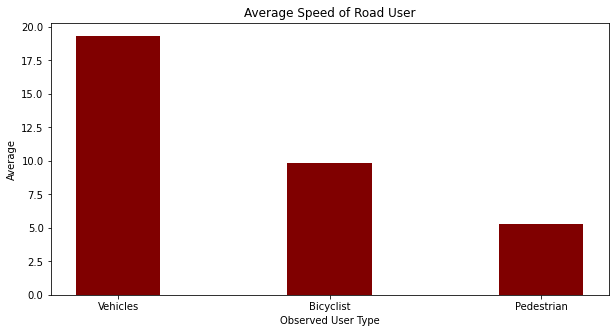

In [ ]:
print('Average speed of vehicles   : ',np.mean(vehicles_avg_speed))
print('Average speed of Bicyclist  : ',np.mean(Bicyclist_avg_speed))
print('Average speed of Pedestrian : ',np.mean(Pedestrian_avg_speed))

users = ['Vehicles','Bicyclist','Pedestrian']
AVG_All = [np.mean(vehicles_avg_speed),np.mean(Bicyclist_avg_speed),np.mean(Pedestrian_avg_speed)]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(users, AVG_All, color ='maroon',
        width = 0.4)

plt.xlabel("Observed User Type")
plt.ylabel("Average")
plt.title("Average Speed of Road User")
plt.show()

min speed of vehicle:  3.309959345168648 			max speed of vehicle:  50.36864801113726
min speed of Bicyclist:  3.6171419873756347 			max speed of Bicyclist:  22.70883193239234
min speed of Pedestrian: 3.4745198290257675 			max speed of Pedestrian: 8.363471082388374


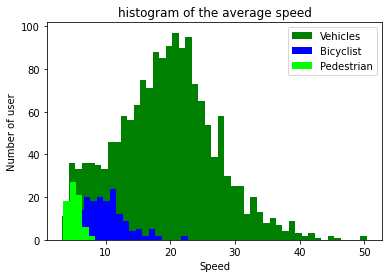

In [ ]:
from matplotlib import pyplot

# bins = numpy.linspace(-10, 10, 100)

# pyplot.hist(x, bins, alpha=0.5, label='x')
# pyplot.hist(y, bins, alpha=0.5, label='y')


%matplotlib inline

x = vehicles_avg_speed
print("min speed of vehicle: ",min(x), "\t\t\tmax speed of vehicle: ",max(x))
y = Bicyclist_avg_speed
print("min speed of Bicyclist: ",min(y),"\t\t\tmax speed of Bicyclist: ",max(y))
z = Pedestrian_avg_speed
print("min speed of Pedestrian:",min(z),"\t\t\tmax speed of Pedestrian:",max(z))
# colors = ['green', 'blue', 'lime']
pyplot.hist(x,color='green',density=False, label='Vehicles', bins=47)
pyplot.hist(y,color='blue',density=False,  label='Bicyclist', bins=19)
pyplot.hist(z,color='lime',density=False,   label='Pedestrian', bins=5)
# density=False would make counts
plt.title("histogram of the average speed")
pyplot.ylabel('Number of user')
pyplot.xlabel('Speed')
pyplot.legend(loc='upper right')
pyplot.show()

# Q5

1399
min of max speed of vehicle:  5.399999999999885 		max of max speed of vehicle:  99.88832364195511


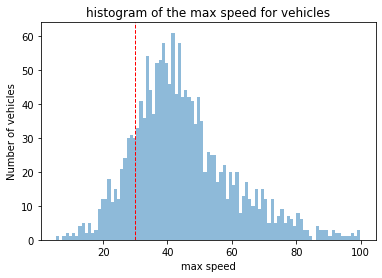

In [ ]:
num_of_over_speed=0
max_speed=[]
for i in SPeed(Vehicles_Trajectoy):
    maxx=i['SPEED'].max()
    max_speed.append(maxx)
    if i['SPEED'].max()>30:
        num_of_over_speed=num_of_over_speed+1
    else:
        pass
print(num_of_over_speed)
print("min of max speed of vehicle: ",min(max_speed), "\t\tmax of max speed of vehicle: ",max(max_speed))


pyplot.hist(max_speed, bins=95, alpha=0.5)
pyplot.axvline(30, color='red', linestyle='dashed', linewidth=1)
plt.title("histogram of the max speed for vehicles")
pyplot.ylabel('Number of vehicles')
pyplot.xlabel('max speed')
pyplot.show()

# Q6

In [ ]:
print("max and min of  frame: ","\n \t\t\t max: ",df['Frame_Number'].max(),
      "\n \t\t\t min: ",df['Frame_Number'].min())
# 63 min , 15 fps   56866/15=3791.0666s = 63 min


max and min of  frame:  
 			 max:  56866 
 			 min:  1


### a) part one

In [ ]:
# Pedestrian_Trajectoy
# Bicyclist_Trajectoy
# Vehicles_Trajectoy
# Buffer=3
conflict_vehicle_pedestrian_pedestrian_arrives_first=[]
for i in Pedestrian_Trajectoy:
    P_arrive_time=i['Frame_Number'].min()
    P_Leave_time =i['Frame_Number'].max()
    P_X_Coordinate_arrive_time=i['X_Coordinate'].idxmin()
    P_Y_Coordinate_arrive_time=i['Y_Coordinate'].idxmin()
    for j in Vehicles_Trajectoy:
        V_arrive_time=j['Frame_Number'].min()
        V_Leave_time =j['Frame_Number'].max()
        V_X_Coordinate_arrive_time=j['X_Coordinate'].idxmin()
        V_Y_Coordinate_arrive_time=j['Y_Coordinate'].idxmin()
        if (P_arrive_time < V_arrive_time < P_Leave_time):# and (math.sqrt((P_X_Coordinate_arrive_time-V_X_Coordinate_arrive_time)**2 +
#                    (P_Y_Coordinate_arrive_time-V_Y_Coordinate_arrive_time)**2))<Buffer:
            PET=abs(P_arrive_time - V_arrive_time)/14
#             print('PET of Vehicle ID: ',str(set(j['User_ID'].tolist())),'and Pedestrian ID: ',str(set(i['User_ID'].tolist())),' is ',PET)
            if PET<10:
                conflict_vehicle_pedestrian_pedestrian_arrives_first.append([set(i['User_ID'].tolist()),
                                                                         set(j['User_ID'].tolist())])
print('num of vehicle,pedestrian conflict while pedestrian arrives first: ',len(conflict_vehicle_pedestrian_pedestrian_arrives_first))


num of vehicle,pedestrian conflict while pedestrian arrives first:  168


In [ ]:
print(conflict_vehicle_pedestrian_pedestrian_arrives_first)

[[{344}, {345}], [{388}, {390}], [{1577}, {1578}]]


### b)

In [ ]:
conflict_vehicle_Bicyclist_Bicyclist_arrives_first=[]
# Buffer=3
for i in Bicyclist_Trajectoy:
    B_arrive_time=i['Frame_Number'].min()
    B_Leave_time =i['Frame_Number'].max()
    B_X_Coordinate_arrive_time=i['X_Coordinate'].idxmin()
    B_Y_Coordinate_arrive_time=i['Y_Coordinate'].idxmin()
    for j in Vehicles_Trajectoy:
        V_arrive_time=j['Frame_Number'].min()
        V_Leave_time =j['Frame_Number'].max()
        V_X_Coordinate_arrive_time=j['X_Coordinate'].idxmin()
        V_Y_Coordinate_arrive_time=j['Y_Coordinate'].idxmin()
        if (B_arrive_time < V_arrive_time < B_Leave_time): #and (math.sqrt((B_X_Coordinate_arrive_time-V_X_Coordinate_arrive_time)**2 +
                   #(B_Y_Coordinate_arrive_time-V_Y_Coordinate_arrive_time)**2))<3:
            PET=abs(B_arrive_time - V_arrive_time)/14
            #print('PET of Vehicle ID: ',str(set(j['User_ID'].tolist())),'and Bicyclist ID: ',str(set(i['User_ID'].tolist())),' is ',PET)
            if PET<10:
                conflict_vehicle_Bicyclist_Bicyclist_arrives_first.append([set(i['User_ID'].tolist()),
                                                                         set(j['User_ID'].tolist())])
print('num of vehicle,Bicyclist conflict while Bicyclist arrives first: ',len(conflict_vehicle_Bicyclist_Bicyclist_arrives_first))

num of vehicle,Bicyclist conflict while Bicyclist arrives first:  465


### c , d)

In [ ]:
conflict_vehicle_pedestrian_PET_less_five=[]
conflict_vehicle_pedestrian_PET_less_two=[]
for i in Pedestrian_Trajectoy:
    P_arrive_time=i['Frame_Number'].min()
    P_Leave_time =i['Frame_Number'].max()
    P_X_Coordinate_arrive_time=i['X_Coordinate'].idxmin()
    P_Y_Coordinate_arrive_time=i['Y_Coordinate'].idxmin()
    for j in Vehicles_Trajectoy:
        V_arrive_time=j['Frame_Number'].min()
        V_Leave_time =j['Frame_Number'].max()
        V_X_Coordinate_arrive_time=j['X_Coordinate'].idxmin()
        V_Y_Coordinate_arrive_time=j['Y_Coordinate'].idxmin()
        if (P_arrive_time < V_arrive_time < P_Leave_time) or (V_arrive_time  < P_arrive_time < V_Leave_time):# and (math.sqrt((P_X_Coordinate_arrive_time-V_X_Coordinate_arrive_time)**2 +
                   #(P_Y_Coordinate_arrive_time-V_Y_Coordinate_arrive_time)**2))<3:
            PET=abs(P_arrive_time - V_arrive_time)/14
#             print('PET of Vehicle ID: ',str(set(j['User_ID'].tolist())),'and Pedestrian ID: ',str(set(i['User_ID'].tolist())),' is ',PET)
            if PET<=5:
                conflict_vehicle_pedestrian_PET_less_five.append([set(i['User_ID'].tolist()),
                                                                         set(j['User_ID'].tolist())])
            if PET<=2:
                conflict_vehicle_pedestrian_PET_less_two.append([set(i['User_ID'].tolist()),
                                                                         set(j['User_ID'].tolist())])
print('num of vehicle,pedestrian conflict with PET ≤ 5s: ',len(conflict_vehicle_pedestrian_PET_less_five))
print('num of vehicle,pedestrian conflict with PET ≤ 2s: ',len(conflict_vehicle_pedestrian_PET_less_two))

num of vehicle,pedestrian conflict with PET ≤ 5s:  111
num of vehicle,pedestrian conflict with PET ≤ 2s:  50


### e,f)

In [ ]:
conflict_vehicle_Bicyclist_PET_less_five=[]
conflict_vehicle_Bicyclist_PET_less_two=[]
for i in Bicyclist_Trajectoy:
    B_arrive_time=i['Frame_Number'].min()
    B_Leave_time =i['Frame_Number'].max()
    B_X_Coordinate_arrive_time=i['X_Coordinate'].idxmin()
    B_Y_Coordinate_arrive_time=i['Y_Coordinate'].idxmin()
    for j in Vehicles_Trajectoy:
        V_arrive_time=j['Frame_Number'].min()
        V_Leave_time =j['Frame_Number'].max()
        V_X_Coordinate_arrive_time=j['X_Coordinate'].idxmin()
        V_Y_Coordinate_arrive_time=j['Y_Coordinate'].idxmin()
        if ((B_arrive_time < V_arrive_time < B_Leave_time) or (V_arrive_time  < B_arrive_time < V_Leave_time)):# and (math.sqrt((B_X_Coordinate_arrive_time-V_X_Coordinate_arrive_time)**2 +
#                    (B_Y_Coordinate_arrive_time-V_Y_Coordinate_arrive_time)**2))<3:
            PET=abs(B_arrive_time - V_arrive_time)/14
#             print('PET of Vehicle ID: ',str(set(j['User_ID'].tolist())),'and Bicyclist ID: ',str(set(i['User_ID'].tolist())),' is ',PET)
            if PET<=5:
                conflict_vehicle_Bicyclist_PET_less_five.append([set(i['User_ID'].tolist()),
                                                                         set(j['User_ID'].tolist())])
            if PET<=2:
                conflict_vehicle_Bicyclist_PET_less_two.append([set(i['User_ID'].tolist()),
                                                                         set(j['User_ID'].tolist())])
print('num of vehicle,Bicyclist conflict with PET ≤ 5s: ',len(conflict_vehicle_Bicyclist_PET_less_five))
print('num of vehicle,Bicyclist conflict with PET ≤ 2s: ',len(conflict_vehicle_Bicyclist_PET_less_two))

num of vehicle,Bicyclist conflict with PET ≤ 5s:  289
num of vehicle,Bicyclist conflict with PET ≤ 2s:  129


### g)

In [ ]:
All_conflict_vehicle_pedestrian=[]
pEt=[]
for i in Pedestrian_Trajectoy:
    P_arrive_time=i['Frame_Number'].min()
    P_Leave_time =i['Frame_Number'].max()
    P_X_Coordinate_arrive_time=i['X_Coordinate'].idxmin()
    P_Y_Coordinate_arrive_time=i['Y_Coordinate'].idxmin()
    for j in Vehicles_Trajectoy:
        V_arrive_time=j['Frame_Number'].min()
        V_Leave_time =j['Frame_Number'].max()
        V_X_Coordinate_arrive_time=j['X_Coordinate'].idxmin()
        V_Y_Coordinate_arrive_time=j['Y_Coordinate'].idxmin()
        if (P_arrive_time < V_arrive_time < P_Leave_time) or (V_arrive_time  < P_arrive_time < V_Leave_time):# and (math.sqrt((P_X_Coordinate_arrive_time-V_X_Coordinate_arrive_time)**2 +
                   #(P_Y_Coordinate_arrive_time-V_Y_Coordinate_arrive_time)**2))<3:
            PET=abs(P_arrive_time - V_arrive_time)/14
            pEt.append(PET)
            All_conflict_vehicle_pedestrian.append([set(i['User_ID'].tolist()),
                                                                         set(j['User_ID'].tolist())])
print('num of All vehicle,pedestrian conflict: ',len(All_conflict_vehicle_pedestrian))
print("min of vehiclevehicle,pedestrian conflict: ",min(pEt), "\nmax of vehicle,pedestrian conflict: ",max(pEt))


num of All vehicle,pedestrian conflict:  339
min of vehiclevehicle,pedestrian conflict:  0.07142857142857142 
max of vehicle,pedestrian conflict:  15.571428571428571


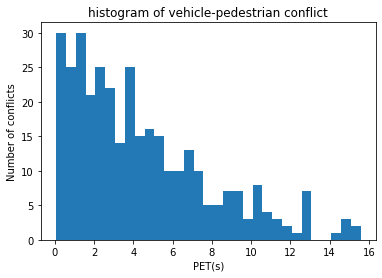

In [ ]:
pyplot.hist(pEt, bins=31,density=False, alpha=.99)
plt.title("histogram of vehicle-pedestrian conflict")
pyplot.ylabel('Number of conflicts')
pyplot.xlabel('PET(s)')
pyplot.show()